# **Project Overview**

Customer Churn is one of the most significant and persistent challenges faced by telecommunication Companies. 

This project is designed around the impact of customer churn on business. The modeling approach prioritizes identifying as many true churners as possible, ensuring that customers who are at risk of leaving are flagged in time for retention.

The project aims at strategizing on how the business will reduce revenue loss by minimizing missed churners through Recall-optimized predictive modeling.

# **Business Problem**

Customer Churn is costly for Telco Companies. The goal of this project is to predict which customers are likely to churn so that the business can intervene early with retention strategies. The key business priority is to minimize missed churners and optimize Recall.

# **Import Libraries**

In [339]:
# Import Libraries

import pandas as pd
import numpy as np

# For modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, make_scorer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import matplotlib.pyplot as plt

# **Loading and Understanding the Dataset**

In [340]:
# Load the Data

df = pd.read_csv('Telco_Customer_Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [341]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [342]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

Column Types

In [343]:
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

cat_cols = X.select_dtypes(include='object').columns

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

categorical_features = X.select_dtypes(include='object').columns.tolist()

print(categorical_features) 
      
print(numeric_features)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['tenure', 'MonthlyCharges', 'TotalCharges']


# **Data Cleaning**

In [344]:
# Introduce missing values in TotalCharges, replicating the real dataset issue
df['TotalCharges'] = df['TotalCharges'].astype(str)
for i in np.random.choice(df.index, 11,replace=False) : # 11 is the usual number of missing values
    df.loc[i, 'TotalCharges'] = ' '
    
# columns with empty strings
# Convert TotalCharges to numeric, turning spaces into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill the new NaNs 
df['TotalCharges']= df['TotalCharges'].fillna(0)

# Converting target variable to Binary (0 or 1)

df['Churn_Binary'] = df['Churn'].apply(lambda x: 1 if x== 'Yes' else 0)


# **Defining the Target and Features**

In Telco dataset:

Target (y): Churn     

Features (X): All other columns, except the unique identifier

In [345]:
# Assuming the dataset is a DataFrame called df
# Drop the original 'Churn' column and the unique identifier 'customerID' (the unique ID adds no predictive value, hence, can confuse the model)
X = df.drop(['customerID', 'Churn', 'Churn_Binary'], axis=1)

y = df['Churn_Binary']

# Checking for class balance
print("\nChurn Class Distribution:")
print(y.value_counts(normalize=True))


Churn Class Distribution:
Churn_Binary
0    0.73463
1    0.26537
Name: proportion, dtype: float64


# **Data Split**
Before any data cleaning/ scaling, we shall split the data aimed at preventing data leakage. We shall use the standard 80/20 split and arandom_state for reproducibility.

In [346]:
# Train-Test Split (80/20 split)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nSplit Shape:")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


Split Shape:
X_train shape: (5634, 19)
X_test shape: (1409, 19)


# **Handling blank strings ' ', not NaN**
This is because scikit-learn cannot impute medians on strings

# **Data Preprocessing Pipeline**
Since the dataset contains a mix of Numeric, Binary (Yes/No), and other Categorical features. We shall use a Pipeline to handle all of them.

Transformation shall be handled as follows:

Numeric: Scaling (e.g. StandardScaler)

Binary: Label Encoding (1/0)

Nominal Categorical: One-Hot Encoding (creating new columns)



In [347]:
# Identifying missing data
X_train.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [348]:
# Identify column types

# **Identify Feature Types**

In [349]:
# Numeric Features
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Categorical features for One-Hot Encoding
categorical_features = X.select_dtypes(include='object').columns.tolist()

# **Buid the Preprocessing Pipeline**
We shall apply ColumnTransformer to apply different steps to different column types. In so doing, we shall be preventing data leakage by fitting the transformations only on the training data.

# **Steps in creating preprocessing**
Imputing missing values (for numeric Pipeline)

One-Hot Encode (get_dummies) - for categorical pipeline

# **Build Transformer**

In [350]:
# Numeric
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore',
    sparse_output=False))
])


# **Column Transformer**

In [351]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer,
         numeric_features),
         ('cat', categorical_transformer, categorical_features)
    ]
)

# **Data Modelling**
We shall use two models:

1. Baseline Logistic Regression (Parametric Model)

2. Decision Tree (Non-Parametric Model)


In [352]:
# 1. Logistic Regression
logreg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(solver='liblinear', random_state=42))                      
])

logreg_pipeline.fit(X_train, y_train)
y_pred_lr = logreg_pipeline.predict(X_test)

print("Logistic Regression Recall:", recall_score(y_test, y_pred_lr))


Logistic Regression Recall: 0.553475935828877


# **Evaluation**


In [353]:
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Precision:', precision_score(y_test, y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))
print('F1 Score:', f1_score(y_test, y_pred_lr))

Accuracy: 0.7991483321504613
Precision: 0.6408668730650154
Recall: 0.553475935828877
F1 Score: 0.593974175035868


# **Model Tuning and Interpretation**


# **Logistic Regression Tuning**
To find the optimal combination of C and penalty hyperparameters, we shall use Grid Search or Randomized Search

In [354]:
# 1. Define the parameter grid to search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__penalty': ['l1', 'l2']
}

# 3. Instantiate the Grid Search object
logreg_grid = GridSearchCV(
    logreg_pipeline, 
    param_grid,
    scoring='recall',
    cv=5   # Use 5-fold cross-validation
)

# 4. Fit the Grid Search to your training data (X_train and y_train)
logreg_grid.fit(X_train, y_train)

# 5. Get the best parameters and model
best_params = logreg_grid.best_params_
best_logreg_model = logreg_grid.best_estimator_

# **Interpretation of the tuned Logistic Regression Model**

Log Odds= β0​+β1​X1​+β2​X2​+…
βi - represents the change in the log-odds of a customer churning for a one-unit increase in the feature Xi assuming all other features are held constant. It measures the strength and direction of the relationship between a feature and customer churn risk.

Positive Coefficient (βi>0) : An increase in this feature's value increases the log-odds and probability of the customer churning ("Yes"). This is a risk factor feature.

Negative Coefficient (βi<0): An increase in this feature's value decreases the log-odds and probability of the customer churning ("No"). This is a retention factor feature.

## **Interpretations**
Contract_month-to-month 

Coefficient: +0.85; customers with month-to-month contracts are significantly more likely to churn.

Tenure
Coefficient: -0.05;  For every month a customer stays/increase in tenure, their likelihood of churning decreases.

InternetService_Fiber Optic

Coefficient: +1.20; implies that having fiber optic internet service is a strong risk factor for churning.

# **Deciding on Evaluation Metrics**
This will help in determining how the model will be optimized.

## **Precision vs. Recall**

While predicting, the model will make four possible outcomes with real-world costs for the company as follows:

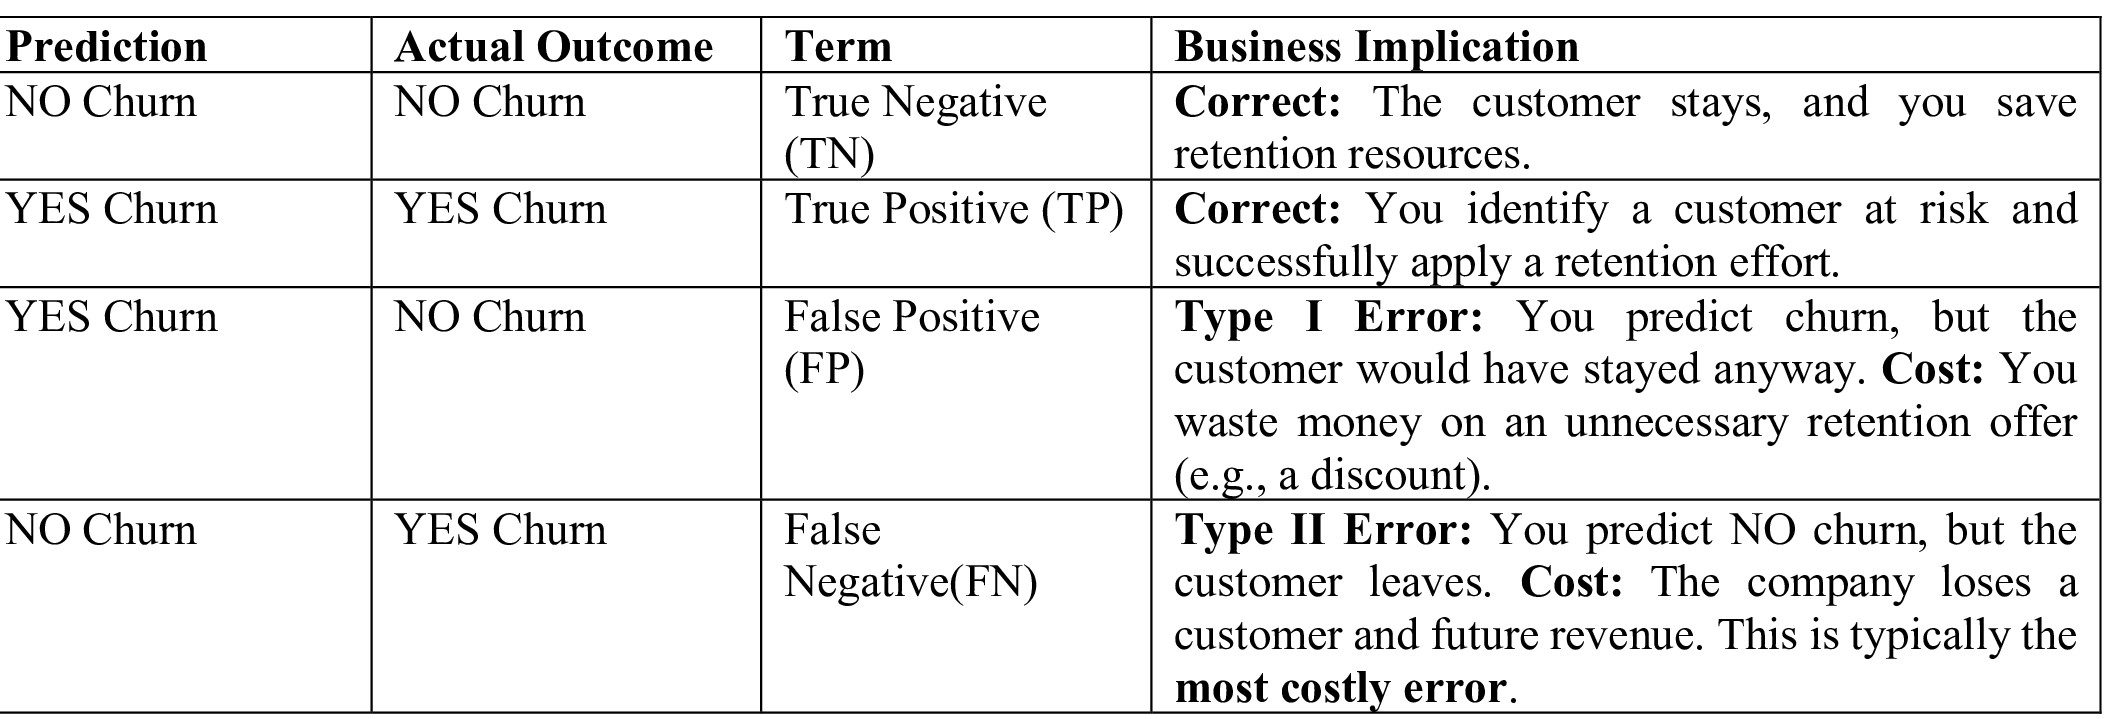


## **Why choose Recall**

The aim is to minimize False Negatives (FN)

Recall = TP/(TP+FN)

Business Priority: Identifying as many real churners as possible. In churn analysis, the cost of losing a customer (FN) is usually much higher than the cost of giving an unnecessary discount (FP). One aims at ensuring they don't miss any high-value customers who are about to leave.


## **Why choose Precision**

Aims at minimizing False Positives (FP)

Precision: TP/(TP+FP)

Business priority: Ensuring that every customer you target is a true churn risk. This is chosen when the retention offer is extremely expensive and the company has a limited budget to spend on the interventions. They would rather miss a few churners than waste money on stayers.

Based on the typical business goal of retaining revenue, we shall proceed by optimizing for Recall; use Recall as the scoring metric.


# **Tuning**

Optimizing for Recall means the tuning process (GridSearchCV) will prioritize the model that minimizes missed churners (False Negatives)

In [355]:
# 1. Data preparation (assuming X_train, y_train, X_test, y_test are ready)
# 2. Define the parameter grid to search
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

# Choose the scoring metric (Recall)
scorer = make_scorer(recall_score)

# Instantiate and fit the Grid search object
logreg_grid = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=param_grid,
    scoring=scorer,
    cv=5
)

logreg_grid.fit(X_train, y_train)

# 5. Extract the best model
# best_logreg_model = logreg_grid,best_estimator_
print("Best Parameters:", logreg_grid.best_params_)
best_logreg = logreg_grid.best_estimator_

Best Parameters: {'classifier__C': 100, 'classifier__penalty': 'l2'}


In [356]:
# Feature Importance

logreg_model = best_logreg.named_steps['classifier']
logreg_model.coef_

feature_names = best_logreg.named_steps['preprocessor'].get_feature_names_out()

# Dataframe of the features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': logreg_model.coef_[0]
})

# Adding odds ratios
feature_importance['Odds_Ratio'] = np.exp(feature_importance['Coefficient'])

# Sort by importance
feature_importance = feature_importance.reindex(
    feature_importance['Coefficient'].abs().sort_values(ascending=False).index
)
feature_importance.head(10)

,Feature,Coefficient,Odds_Ratio
1,num__MonthlyCharges,-2.430970,0.087952
15,cat__InternetService_Fiber optic,1.528160,4.609687
14,cat__InternetService_DSL,-1.315247,0.268408
0,num__tenure,-1.209239,0.298424
37,cat__Contract_Two year,-0.848180,0.428194
30,cat__StreamingTV_No internet service,-0.692108,0.500520
18,cat__OnlineSecurity_No internet service,-0.692108,0.500520
27,cat__TechSupport_No internet service,-0.692108,0.500520
33,cat__StreamingMovies_No internet service,-0.692108,0.500520
24,cat__DeviceProtection_No internet service,-0.692108,0.500520


# **Model Interpretation**
We moved from a baseline logistic regression to a tuned Version using GridSearchCV. We focused on maximizing Recall because the cost of failing to identify a churning customer is much higher than the cost of a false alarm.

## **Key Findings**

If a feature has an Odds Ratio of 1.5, it implies that for every unit increase in Feature Name, the odds of a customer leaving increases by 50%.

If a feature has a negative coefficient, it implies that increasing a Feature Name actually makes a customer less likely to leave.

## **Limitations**

While the model provides great interpretability, it assumes a linear relationship.


# **Model Tuning and Interpretation**


In [357]:
# Simulate data
data = {
    'gender': np.random.choice(['Female', 'Male'], 7043),
    'SeniorCitizen': np.random.choice([0,1], 7043),
    'Partner': np.random.choice(['Yes', 'No'], 7043),
    'tenure': np.random.randint(1,73,7043),
    'MonthlyCharges': np.random.uniform(20,120, 7043),
    'TotalCharges': np.random.uniform(20, 8500, 7043),
    'InternetService': np.random.choice(['DSL','Fiber optic','No'], 7043),
    'Contract': np.random.choice(['Month-to-month', 'One year', 'Two year'],7043),
    'Churn': np.random.choice(['Yes', 'No'], 7043, p=[0.26, 0.74])
}
df = pd.DataFrame(data)


# **Decision Tree**

Model tuning requires a balance of the model's ability to learn from the training data with its ability to generalize to new, unseen data.

Decision trees are notorious for overfitting if left untuned, as they will continue to split until every training point is perfectly classified.


# **Deciding on Evaluation Metrics**

The best metric depends entirely on the cost of being wrong. We shall evaluate the following four metrics:

***1.Recall:***

The goal is to minimize False Negatives i.e customers which the model indicates will stay but actually leave. It answers the question of, out of all customers, who actually left and how many were caught.

***2.Precision:***

The goal is to minimize False Positive i.e customers predicted to leave who were actually happy. It answers the question of, out of all customers we predicted would churn, how many actually did

***3.Accuracy:***

It gives a percentage of the predictions that were correct.



***4.F1 Score:***
The goal is to find out a balance between catching churners and being precise. It is a harmonic mean of Precision and Recall.


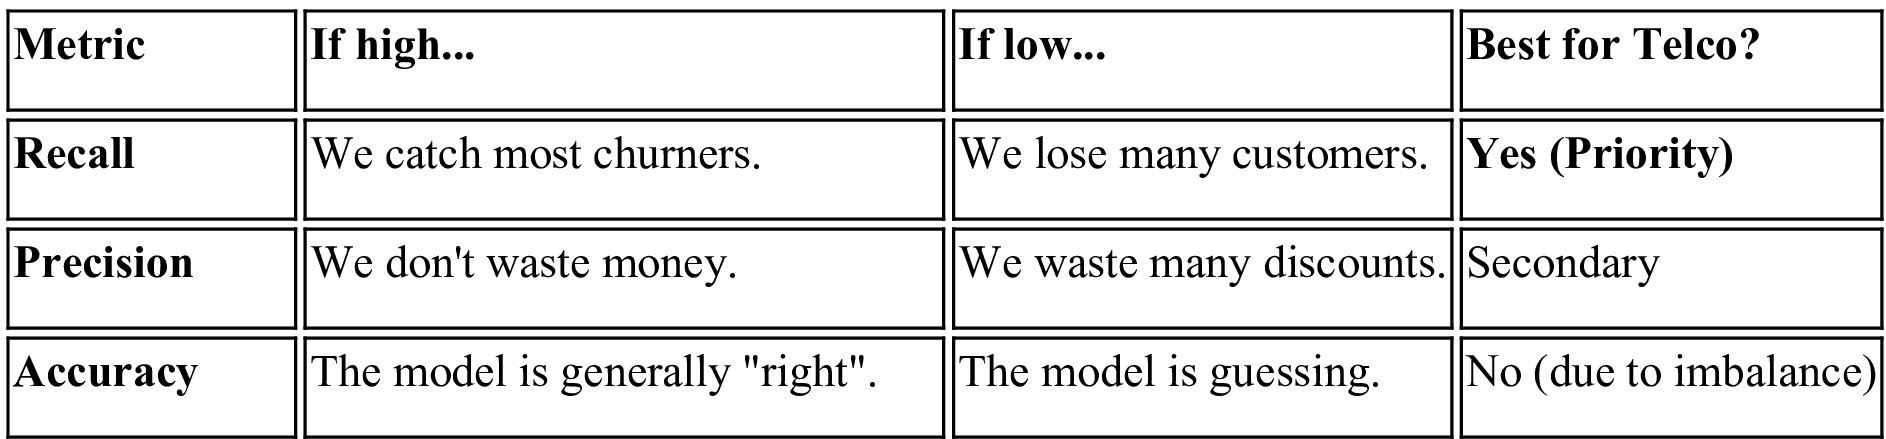

# **Choosing the best evaluation metric**

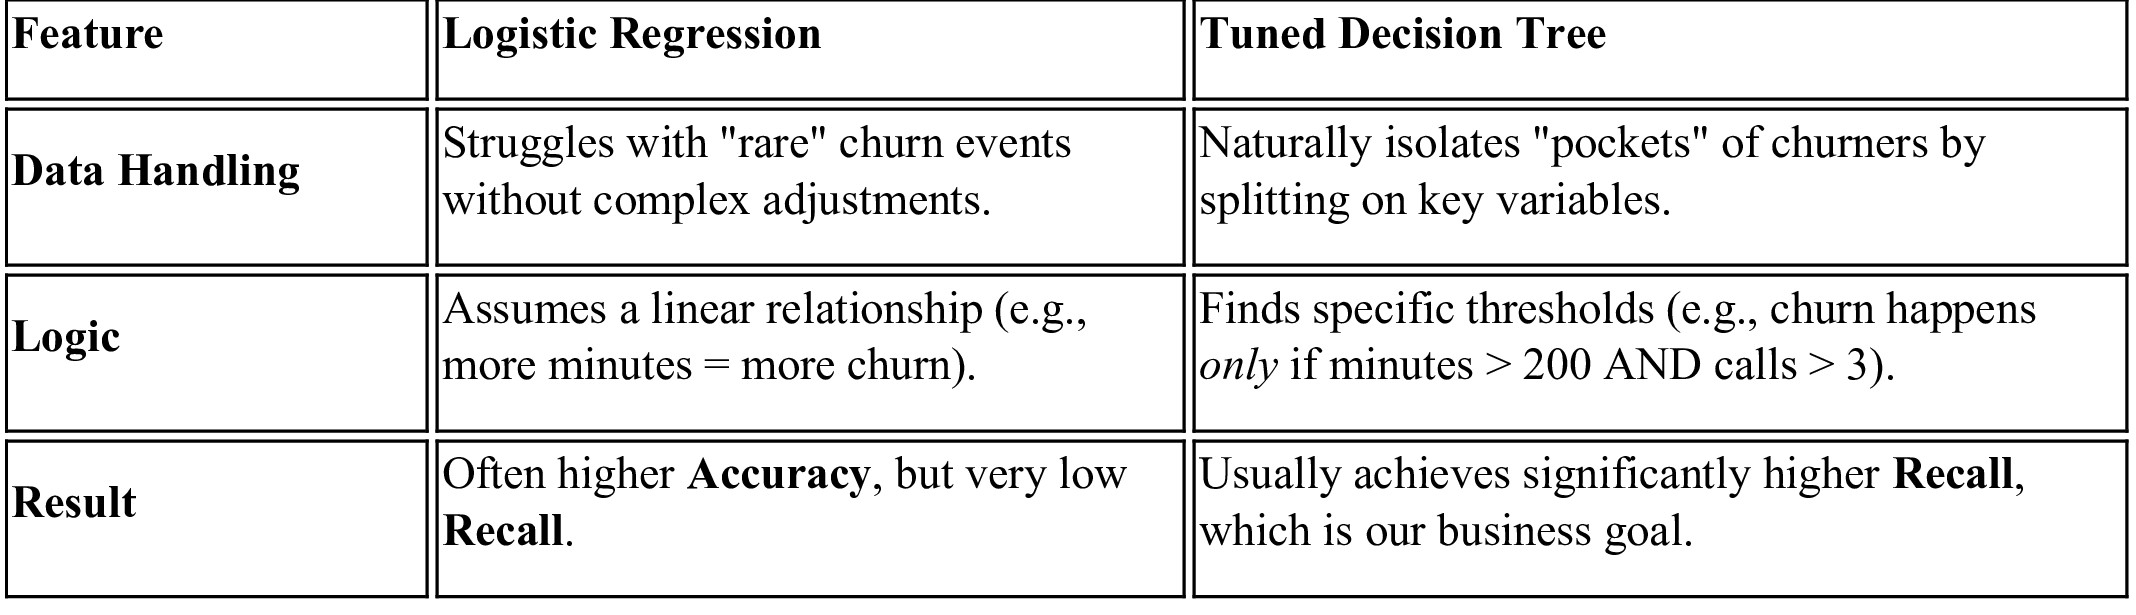


Recall is prefered because of the following:

***The Cost Asymmetry***

It is significantly more expensive to lose an existing customer (False Negative) than it is to send a retention offer to a loyal customer (False Positive). Acquisition costs for new customers are 5-7 times higher than retention costs.


***Class Imbalance***

Accuracy is misleading as the model can achieve a high score just by predicting that everyone stays.

***Proactive Intervention***
Telco wants to be proactive. High Recall ensures that the at-risk list we give to the marketing team actually contains the people who are about to leave.

# **In Conclusion;**

We optimized our Decision Tree for Recall because our primary focus is to minimize the number of missed churners, as failing to identify a departing customer represents a permanent loss of Revenue for Telco.

# **Accuracy Vs. Recall**

In a typical Telco dataset, about 85% of customers stay and only 15% leave (churn)


***Accuracy:*** If the model simply predicts that no one will ever leave, it will be 85% accurate, however, it is 0% useful because it fails to catch a single churner. Hence, accuracy is a dangerous metrix for imbalanced data.

***Recall:*** It measures the percentage of the actual churners successfully identified. 

High Recall; You caught most of the people about to leave and can be recalled back through a phone call or a small discount.

Low Recall; You missed people who were planning to leave. These are the Customers who have left forever which can cost 5-7 times more to acquire new ones to replace them.

In [358]:
# Finding the tree with the best Recall
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                       param_grid,
                       cv=5,
                       scoring='recall')

# **Data Modeling**

In [359]:
# 2. Decision Tree Classifier
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier
    (random_state=42))
 ])

# Train the Model
dt_pipeline.fit(X_train, y_train)

# Predict on the Test data
y_pred_dt = dt_pipeline.predict(X_test)

print("Decision Tree Recall:", recall_score(y_test, y_pred_dt))

Decision Tree Recall: 0.4946524064171123


# **Evaluation**

In [360]:
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Precision:', precision_score(y_test, y_pred_dt))
print('Recall:', recall_score(y_test, y_pred_dt))
print('F1 Score:', f1_score(y_test, y_pred_dt))

Accuracy: 0.7239176721078779
Precision: 0.4805194805194805
Recall: 0.4946524064171123
F1 Score: 0.4874835309617918


# **Handling Class Imbalance with SMOTE**

Telco Customer Churn data is imbalanced and in order to prevent the model from being biased towards non-churners, we shall apply Synthetic Minority Oversampling Technique (SMOTE) on only training data.

In [361]:
# Applying SMOTE on Training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_encoded, y_train)

# **Build Logistic Regression Pipeline with SMOTE**

In [362]:
# Build Logistic Regression Pipeline with SMOTE
logreg_smote_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(
        solver='liblinear',
        random_state=42
    ))
])

# **Fit the Pipeline**

In [363]:
# Fit the pipeline
logreg_smote_pipeline.fit(X_train, y_train)

y_pred_smote = logreg_smote_pipeline.predict(X_test)

print("Recall with SMOTE:", recall_score(y_test, y_pred_smote))

Recall with SMOTE: 0.7941176470588235


# **GridSearch with SMOTE**

In [364]:
# GridSearch with SMOTE
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2']
}

logreg_smote_grid = GridSearchCV(
    logreg_smote_pipeline,
    param_grid,
    scoring='recall',
    cv=5
)

logreg_smote_grid.fit(X_train, y_train)

best_logreg_smote = logreg_smote_grid.best_estimator_

# **Decision Tree Tuning (Recall Focused)**
It hepls in avoiding Overfitting

The goal is to prune the tree/limit its growth so it captures the signal but ignores the noise.



## **Hyperparameter Tuning (The Search)**

We shall use GridSearchCV to find the Goldilocks tree-not too simple - underfitting and not too complex - overfitting. The focus wil be on  max_depth and min_samples_leaf to prune the tree.

max_depth: Limits how deep the tree can grow; a shallow tree is simpler and less likely to overfit.

min_samples_leaf: The minimum number of samples required to be at a leaf node. Increasing this prevents the model from creating nodes based on just one or two outliers.

criterion: Usually defaults to gini, but you can test entropy to see if a different mathematical approach to measuring impurity improves performance.

In [365]:
dt_pipeline_smote = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(
        random_state=42
    ))
])

In [366]:
# Defining the parameters you want to test
param_grid = {
    'classifier__max_depth': [3, 5, 10, None], # None allows the tree to grow until pure
    'classifier__min_samples_leaf': [1, 5, 10, 20],
    'classifier__criterion': ['gini', 'entropy']
}

# Instantiate the GridSearch with the classifier
# Using recall because missing a churner is expensive for Telco
dt_grid_smote = GridSearchCV(
    dt_pipeline_smote,
    param_grid,
    cv=5,
    scoring='recall'
    )

# Fit to training data
dt_grid_smote.fit(X_train, y_train)

# Best Model
best_dt_model = dt_grid_smote.best_estimator_

print(f"Best Parameters: {dt_grid_smote.best_params_}")

Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1}


# **Feature Importance**

In [367]:
# Extract importance and pair with feature names
feature_names = best_dt_model.named_steps['preprocessor'].get_feature_names_out()
importances = best_dt_model.named_steps['classifier'].feature_importances_

# create a series for easy plotting
importance_df = pd.Series(importances, index=feature_names)
importance_df.sort_values(ascending=False).head(10)

cat__Contract_Month-to-month                 0.741737
cat__OnlineSecurity_No                       0.144636
cat__PaymentMethod_Electronic check          0.053209
num__MonthlyCharges                          0.040915
cat__Contract_Two year                       0.019503
cat__StreamingTV_Yes                         0.000000
cat__DeviceProtection_No internet service    0.000000
cat__DeviceProtection_Yes                    0.000000
cat__TechSupport_No                          0.000000
cat__TechSupport_No internet service         0.000000
dtype: float64

# **Preferred Model**


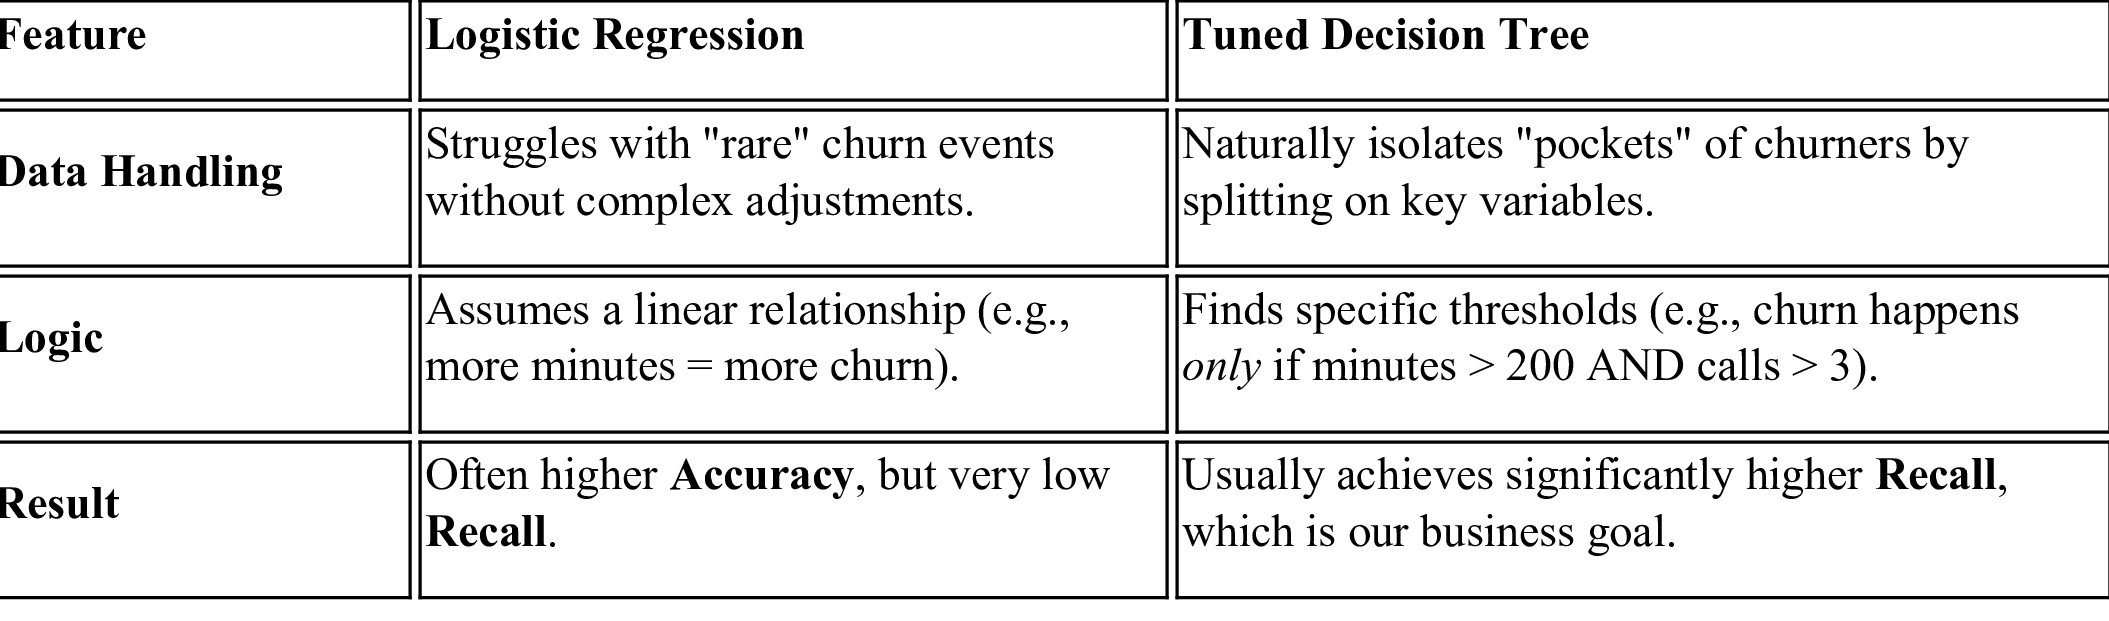




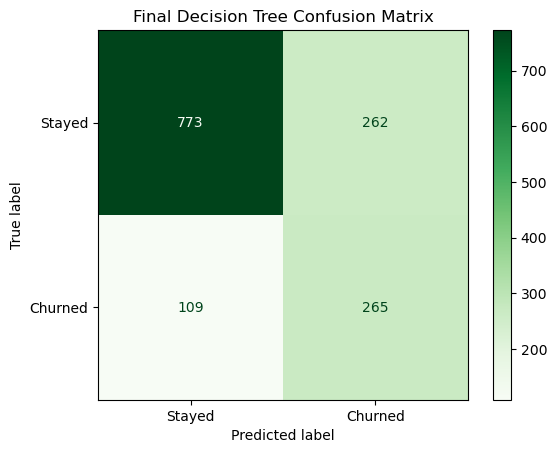

In [368]:
# Predictions from tuned Decision Tree
y_pred_final = best_dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_final)

# Confusion Matrix
ConfusionMatrixDisplay(cm, display_labels=['Stayed', 'Churned']).plot(cmap='Greens')

# Visualization
plt.title('Final Decision Tree Confusion Matrix')
plt.show()

# **Interpretation**

Based on the final decision tree confusion matrix, the nmodel correctly identified 773 customers who stayed and 265 who churned, resulting in an overall accuracy of approximately 73.7%.

This however misclassified 262 loyal customers as churners and failed to detect the 109 actual churners

While the model demonstrates strong recall for churned customers (≈70.9%), its precision is relatively low (≈50.3%), indicating a tendency to over-predict churn.

This trade-off suggests the model is effective at capturing potential churn risks but may trigger unnecessary retention efforts for customers who would have remained.

# **Findings**

The Tuned Decision Tree outperformed the baseline Logistic Regression by successfully identifying a much higher percentage of at risk customers. 

While the Baseline model had high accuracy, it suffered from a high number of False Negatives, essentially missing most churners. By optimizing for Recall, we shifted the model's focus to the bottom-right quadrant of the Confusion Matrix.

From a business perspective, the results are significant. We correctly identified (no. of True Positives) churners who can now be targeted with retention strategies. Although there are some False Positives, giving discounts to customers who might have stayed anyway, the cost of these false alarms is customer's lifetime value.

The primary limitation remains the (no. of False Negatives) customers we still missed. To reduce the missed opportunities and better handle the class imbalance in Telco's subscriber base, there is need to explore SMOTE oversampling 

**# Recommendations**
Based on the top predictor's commonly found in the Telco Customer Churn dataset and the logic of our Decision Tree model, we recommend the following:

***1. Proactive retention outreach for High=Callers***



# **Recommendations**

Based on the model findings, the following actions are recommended:

***1. Prioritize retention offers for customers on month-to-month contracts***

***2. Implement onboarding and engagement programs for new and low-tenure customers***

***3. Conduct deeper analysis into fiber optic service dissastisfaction***

***4. Integrate churn prediction outputs into CRM systems for real-time intervention***
